In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt
import cv2

%matplotlib inline

global embed
embed = hub.KerasLayer(os.getcwd())




In [2]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

In [3]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image 
    """
    with open(FileName, "rb") as f:
        data = f.read()
        
    res = base64.b64encode(data)
    
    base64data = res.decode("UTF-8")
    
    imgdata = base64.b64decode(base64data)
    
    image = Image.open(io.BytesIO(imgdata))
    
    return np.array(image)

In [4]:
def preprocessor():
    image = cv2.imread('images/sign1.jpeg')
    image1 = cv2.imread('images/sign2.jpeg')
    result = cv2.imread('images/sign1.jpeg')
    result1 = cv2.imread('images/sign2.jpeg')
    #plt.imshow(convertBase64('images/im1.jpeg'))
    
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)

    lower = np.array([90, 38, 0])
    upper = np.array([145, 255, 255])


    mask = cv2.inRange(image, lower, upper)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

    close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    boxes = []
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        boxes.append([x,y, x+w,y+h])

    boxes = np.asarray(boxes)
    left = np.min(boxes[:,0])
    top = np.min(boxes[:,1])
    right = np.max(boxes[:,2])
    bottom = np.max(boxes[:,3])

    result[close==0] = (255,255,255)
    ROI = result[top:bottom, left:right].copy()
    rect=cv2.rectangle(result, (left,top), (right,bottom), (36, 255, 12), 2)


    lower1 = np.array([90, 38, 0])
    upper1 = np.array([145, 255, 255])
    mask1 = cv2.inRange(image1, lower1, upper1)

    #cv2.imshow("mask",mask1)

    kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

    opening1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel1, iterations=1)

    close1 = cv2.morphologyEx(opening1, cv2.MORPH_CLOSE, kernel1, iterations=2)

    cnts1 = cv2.findContours(close1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



    cnts1 = cnts1[0] if len(cnts1) == 2 else cnts1[1]

    boxes1 = []
    for c1 in cnts1:
        (x, y, w, h) = cv2.boundingRect(c1)
        boxes1.append([x,y, x+w,y+h])

    boxes1 = np.asarray(boxes1)
    left1 = np.min(boxes1[:,0])
    top1 = np.min(boxes1[:,1])
    right1 = np.max(boxes1[:,2])
    bottom1 = np.max(boxes1[:,3])

    result1[close1==0] = (255,255,255)
    ROI1 = result1[top1:bottom1, left1:right1].copy()
    rect1=cv2.rectangle(result1, (left1,top1), (right1,bottom1), (36, 255, 12), 2)
    
    
    cv2.imshow("roi",ROI)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite('images/ROI.png', ROI)
    cv2.imwrite('images/ROI1.png', ROI1)
  


In [5]:
preprocessor()

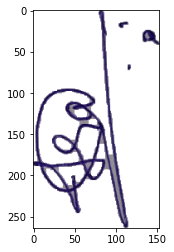

In [6]:
plt.imshow(convertBase64('images/ROI.png'))

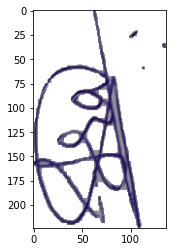

In [7]:
plt.imshow(convertBase64('images/ROI1.png'))

In [8]:
helper = TensorVector('images/ROI.png')
vector = helper.process()

In [23]:
len(vector)

1280

In [9]:
helper = TensorVector("images/ROI1.png")
vector2 = helper.process()

In [25]:
len(vector2)

1280

In [10]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim
    '''if(cosine_sim>=0.91):
        print("BOTH THE SIGNATURES ARE FROM SAME USER")
    elif(cosine_sim>=0.8 and cosign_sim<0.91):
        print("SKILLED FORGERY")
    else:
        print("BOTH ARE NOT FROM SAME USER")'''

In [13]:
cosineSim(vector, vector2)

NameError: name 'cosign_sim' is not defined

In [11]:
res=cosineSim(vector, vector2)

In [12]:
print(res)

0.9410711769445564
